# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=True # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/v2_malli_base_dev_stoch'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear')

Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.728    |
| fps                | 1396     |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| policy_loss        | -0.244   |
| total_timesteps    | 1616     |
| value_loss    

---------------------------------
| explained_variance | 0.758    |
| fps                | 3237     |
| nupdates           | 60       |
| policy_entropy     | 1.14     |
| policy_loss        | -0.0545  |
| total_timesteps    | 96960    |
| value_loss         | 3.14     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3258     |
| nupdates           | 70       |
| policy_entropy     | 1.06     |
| policy_loss        | 0.0823   |
| total_timesteps    | 113120   |
| value_loss         | 0.0492   |
---------------------------------
---------------------------------
| explained_variance | 0.468    |
| fps                | 3266     |
| nupdates           | 80       |
| policy_entropy     | 1.08     |
| policy_loss        | -0.716   |
| total_timesteps    | 129280   |
| value_loss         | 6.98     |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.582    |
| fps                | 3312     |
| nupdates           | 330      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.217   |
| total_timesteps    | 533280   |
| value_loss         | 4.61     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3314     |
| nupdates           | 340      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.177    |
| total_timesteps    | 549440   |
| value_loss         | 0.0785   |
---------------------------------
---------------------------------
| explained_variance | 0.845    |
| fps                | 3317     |
| nupdates           | 350      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.135   |
| total_timesteps    | 565600   |
| value_loss         | 1.97     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3331     |
| nupdates           | 600      |
| policy_entropy     | 0.993    |
| policy_loss        | 0.0883   |
| total_timesteps    | 969600   |
| value_loss         | 0.0812   |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 3334     |
| nupdates           | 610      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.156   |
| total_timesteps    | 985760   |
| value_loss         | 1.48     |
---------------------------------
---------------------------------
| explained_variance | 0.816    |
| fps                | 3334     |
| nupdates           | 620      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0961  |
| total_timesteps    | 1001920  |
| value_loss         | 2.54     |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps         

---------------------------------
| explained_variance | 0.947    |
| fps                | 3241     |
| nupdates           | 870      |
| policy_entropy     | 0.856    |
| policy_loss        | 0.0948   |
| total_timesteps    | 1405920  |
| value_loss         | 0.778    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 3241     |
| nupdates           | 880      |
| policy_entropy     | 0.872    |
| policy_loss        | -0.0744  |
| total_timesteps    | 1422080  |
| value_loss         | 0.655    |
---------------------------------
---------------------------------
| explained_variance | 0.815    |
| fps                | 3240     |
| nupdates           | 890      |
| policy_entropy     | 0.885    |
| policy_loss        | -0.11    |
| total_timesteps    | 1438240  |
| value_loss         | 2.33     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3216     |
| nupdates           | 1140     |
| policy_entropy     | 0.87     |
| policy_loss        | 0.101    |
| total_timesteps    | 1842240  |
| value_loss         | 0.085    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 3216     |
| nupdates           | 1150     |
| policy_entropy     | 0.995    |
| policy_loss        | 0.016    |
| total_timesteps    | 1858400  |
| value_loss         | 0.629    |
---------------------------------
---------------------------------
| explained_variance | 0.91     |
| fps                | 3214     |
| nupdates           | 1160     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.0233   |
| total_timesteps    | 1874560  |
| value_loss         | 1.14     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.864    |
| fps                | 3213     |
| nupdates           | 1410     |
| policy_entropy     | 0.896    |
| policy_loss        | -0.0611  |
| total_timesteps    | 2278560  |
| value_loss         | 1.73     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3214     |
| nupdates           | 1420     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.125    |
| total_timesteps    | 2294720  |
| value_loss         | 0.116    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3215     |
| nupdates           | 1430     |
| policy_entropy     | 0.846    |
| policy_loss        | 0.0987   |
| total_timesteps    | 2310880  |
| value_loss         | 0.0608   |
---------------------------------
---------------------------------
| explained_variance | 0.794    |
| fps         

---------------------------------
| explained_variance | 0.894    |
| fps                | 3215     |
| nupdates           | 1680     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.204   |
| total_timesteps    | 2714880  |
| value_loss         | 1.38     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 3216     |
| nupdates           | 1690     |
| policy_entropy     | 0.973    |
| policy_loss        | 0.0746   |
| total_timesteps    | 2731040  |
| value_loss         | 0.672    |
---------------------------------
---------------------------------
| explained_variance | 0.861    |
| fps                | 3212     |
| nupdates           | 1700     |
| policy_entropy     | 0.899    |
| policy_loss        | -0.0933  |
| total_timesteps    | 2747200  |
| value_loss         | 1.83     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.887    |
| fps                | 3199     |
| nupdates           | 1950     |
| policy_entropy     | 0.934    |
| policy_loss        | -0.0254  |
| total_timesteps    | 3151200  |
| value_loss         | 1.28     |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 3199     |
| nupdates           | 1960     |
| policy_entropy     | 0.873    |
| policy_loss        | 0.0873   |
| total_timesteps    | 3167360  |
| value_loss         | 0.115    |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 3199     |
| nupdates           | 1970     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0442  |
| total_timesteps    | 3183520  |
| value_loss         | 1.2      |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 3199     |
| nupdates           | 2220     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.0139   |
| total_timesteps    | 3587520  |
| value_loss         | 0.657    |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps                | 3198     |
| nupdates           | 2230     |
| policy_entropy     | 0.967    |
| policy_loss        | 0.00215  |
| total_timesteps    | 3603680  |
| value_loss         | 1.16     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3198     |
| nupdates           | 2240     |
| policy_entropy     | 0.964    |
| policy_loss        | 0.124    |
| total_timesteps    | 3619840  |
| value_loss         | 0.0899   |
---------------------------------
---------------------------------
| explained_variance | 0.796    |
| fps         

---------------------------------
| explained_variance | 0.769    |
| fps                | 3199     |
| nupdates           | 2490     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0572  |
| total_timesteps    | 4023840  |
| value_loss         | 2.63     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3199     |
| nupdates           | 2500     |
| policy_entropy     | 0.915    |
| policy_loss        | 0.0846   |
| total_timesteps    | 4040000  |
| value_loss         | 0.076    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3200     |
| nupdates           | 2510     |
| policy_entropy     | 0.976    |
| policy_loss        | 0.0429   |
| total_timesteps    | 4056160  |
| value_loss         | 0.0519   |
---------------------------------
---------------------------------
| explained_variance | 0.87     |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 3201     |
| nupdates           | 2760     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.141    |
| total_timesteps    | 4460160  |
| value_loss         | 0.0702   |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 3201     |
| nupdates           | 2770     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0598  |
| total_timesteps    | 4476320  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.514    |
| fps                | 3201     |
| nupdates           | 2780     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.362   |
| total_timesteps    | 4492480  |
| value_loss         | 5.9      |
---------------------------------
---------------------------------
| explained_variance | 0.827    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 3203     |
| nupdates           | 3030     |
| policy_entropy     | 0.989    |
| policy_loss        | 0.0608   |
| total_timesteps    | 4896480  |
| value_loss         | 0.0413   |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 3203     |
| nupdates           | 3040     |
| policy_entropy     | 0.961    |
| policy_loss        | 0.0579   |
| total_timesteps    | 4912640  |
| value_loss         | 0.87     |
---------------------------------
---------------------------------
| explained_variance | 0.767    |
| fps                | 3203     |
| nupdates           | 3050     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0526  |
| total_timesteps    | 4928800  |
| value_loss         | 2.84     |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.944    |
| fps                | 3203     |
| nupdates           | 3300     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0246  |
| total_timesteps    | 5332800  |
| value_loss         | 0.672    |
---------------------------------
---------------------------------
| explained_variance | 0.907    |
| fps                | 3203     |
| nupdates           | 3310     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.0299  |
| total_timesteps    | 5348960  |
| value_loss         | 1.2      |
---------------------------------
---------------------------------
| explained_variance | 0.651    |
| fps                | 3203     |
| nupdates           | 3320     |
| policy_entropy     | 0.943    |
| policy_loss        | -0.00533 |
| total_timesteps    | 5365120  |
| value_loss         | 3.58     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.818    |
| fps                | 3205     |
| nupdates           | 3570     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.00527 |
| total_timesteps    | 5769120  |
| value_loss         | 2.25     |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 3205     |
| nupdates           | 3580     |
| policy_entropy     | 0.985    |
| policy_loss        | 0.037    |
| total_timesteps    | 5785280  |
| value_loss         | 0.655    |
---------------------------------
---------------------------------
| explained_variance | 0.836    |
| fps                | 3206     |
| nupdates           | 3590     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.219   |
| total_timesteps    | 5801440  |
| value_loss         | 2.39     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.669    |
| fps                | 3205     |
| nupdates           | 3840     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0604  |
| total_timesteps    | 6205440  |
| value_loss         | 4.32     |
---------------------------------
---------------------------------
| explained_variance | 0.648    |
| fps                | 3206     |
| nupdates           | 3850     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0619  |
| total_timesteps    | 6221600  |
| value_loss         | 3.87     |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 3206     |
| nupdates           | 3860     |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0271  |
| total_timesteps    | 6237760  |
| value_loss         | 0.677    |
---------------------------------
---------------------------------
| explained_variance | 0.865    |
| fps         

---------------------------------
| explained_variance | 0.908    |
| fps                | 3207     |
| nupdates           | 4110     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00842 |
| total_timesteps    | 6641760  |
| value_loss         | 1.27     |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 3207     |
| nupdates           | 4120     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.175    |
| total_timesteps    | 6657920  |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3207     |
| nupdates           | 4130     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0857   |
| total_timesteps    | 6674080  |
| value_loss         | 0.0812   |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3206     |
| nupdates           | 4380     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.166    |
| total_timesteps    | 7078080  |
| value_loss         | 0.114    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 3206     |
| nupdates           | 4390     |
| policy_entropy     | 0.931    |
| policy_loss        | 0.0391   |
| total_timesteps    | 7094240  |
| value_loss         | 0.707    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3206     |
| nupdates           | 4400     |
| policy_entropy     | 0.982    |
| policy_loss        | 0.0515   |
| total_timesteps    | 7110400  |
| value_loss         | 0.0717   |
---------------------------------
---------------------------------
| explained_variance | 0.574    |
| fps         

---------------------------------
| explained_variance | 0.905    |
| fps                | 3196     |
| nupdates           | 4650     |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0855  |
| total_timesteps    | 7514400  |
| value_loss         | 1.22     |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps                | 3196     |
| nupdates           | 4660     |
| policy_entropy     | 0.913    |
| policy_loss        | -0.0991  |
| total_timesteps    | 7530560  |
| value_loss         | 1.81     |
---------------------------------
---------------------------------
| explained_variance | 0.767    |
| fps                | 3195     |
| nupdates           | 4670     |
| policy_entropy     | 1        |
| policy_loss        | 0.00295  |
| total_timesteps    | 7546720  |
| value_loss         | 2.53     |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3186     |
| nupdates           | 4920     |
| policy_entropy     | 0.927    |
| policy_loss        | 0.0542   |
| total_timesteps    | 7950720  |
| value_loss         | 0.101    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 3186     |
| nupdates           | 4930     |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0251  |
| total_timesteps    | 7966880  |
| value_loss         | 0.601    |
---------------------------------
---------------------------------
| explained_variance | 0.37     |
| fps                | 3186     |
| nupdates           | 4940     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.229   |
| total_timesteps    | 7983040  |
| value_loss         | 9.07     |
---------------------------------
---------------------------------
| explained_variance | 0.728    |
| fps         

---------------------------------
| explained_variance | 0.435    |
| fps                | 3195     |
| nupdates           | 5190     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.286   |
| total_timesteps    | 8387040  |
| value_loss         | 7.46     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 3195     |
| nupdates           | 5200     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00466  |
| total_timesteps    | 8403200  |
| value_loss         | 0.7      |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 3196     |
| nupdates           | 5210     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0593  |
| total_timesteps    | 8419360  |
| value_loss         | 0.827    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.869    |
| fps                | 3205     |
| nupdates           | 5460     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0735  |
| total_timesteps    | 8823360  |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| explained_variance | 0.75     |
| fps                | 3206     |
| nupdates           | 5470     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0517  |
| total_timesteps    | 8839520  |
| value_loss         | 2.47     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3206     |
| nupdates           | 5480     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.157    |
| total_timesteps    | 8855680  |
| value_loss         | 0.0926   |
---------------------------------
---------------------------------
| explained_variance | 0.791    |
| fps         

---------------------------------
| explained_variance | 0.948    |
| fps                | 3214     |
| nupdates           | 5730     |
| policy_entropy     | 0.93     |
| policy_loss        | -0.00018 |
| total_timesteps    | 9259680  |
| value_loss         | 0.646    |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 3215     |
| nupdates           | 5740     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.0689  |
| total_timesteps    | 9275840  |
| value_loss         | 1.89     |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 3215     |
| nupdates           | 5750     |
| policy_entropy     | 0.903    |
| policy_loss        | 0.02     |
| total_timesteps    | 9292000  |
| value_loss         | 0.645    |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 3222     |
| nupdates           | 6000     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0207  |
| total_timesteps    | 9696000  |
| value_loss         | 0.609    |
---------------------------------
---------------------------------
| explained_variance | 0.724    |
| fps                | 3223     |
| nupdates           | 6010     |
| policy_entropy     | 0.883    |
| policy_loss        | -0.154   |
| total_timesteps    | 9712160  |
| value_loss         | 3.56     |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 3223     |
| nupdates           | 6020     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.045   |
| total_timesteps    | 9728320  |
| value_loss         | 0.895    |
---------------------------------
---------------------------------
| explained_variance | 0.895    |
| fps         

---------------------------------
| explained_variance | 0.747    |
| fps                | 3230     |
| nupdates           | 6270     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.172   |
| total_timesteps    | 10132320 |
| value_loss         | 2.7      |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3230     |
| nupdates           | 6280     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.169    |
| total_timesteps    | 10148480 |
| value_loss         | 0.0891   |
---------------------------------
---------------------------------
| explained_variance | 0.92     |
| fps                | 3230     |
| nupdates           | 6290     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0389  |
| total_timesteps    | 10164640 |
| value_loss         | 1.03     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.944    |
| fps                | 3237     |
| nupdates           | 6540     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.0884   |
| total_timesteps    | 10568640 |
| value_loss         | 0.725    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3237     |
| nupdates           | 6550     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.165    |
| total_timesteps    | 10584800 |
| value_loss         | 0.116    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3238     |
| nupdates           | 6560     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.139    |
| total_timesteps    | 10600960 |
| value_loss         | 0.0727   |
---------------------------------
---------------------------------
| explained_variance | 0.598    |
| fps         

---------------------------------
| explained_variance | 0.343    |
| fps                | 3244     |
| nupdates           | 6810     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0903  |
| total_timesteps    | 11004960 |
| value_loss         | 7.65     |
---------------------------------
---------------------------------
| explained_variance | 0.803    |
| fps                | 3245     |
| nupdates           | 6820     |
| policy_entropy     | 0.996    |
| policy_loss        | 0.0173   |
| total_timesteps    | 11021120 |
| value_loss         | 2.49     |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 3244     |
| nupdates           | 6830     |
| policy_entropy     | 0.887    |
| policy_loss        | 0.0968   |
| total_timesteps    | 11037280 |
| value_loss         | 0.119    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.499    |
| fps                | 3250     |
| nupdates           | 7080     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.332   |
| total_timesteps    | 11441280 |
| value_loss         | 5.36     |
---------------------------------
---------------------------------
| explained_variance | 0.891    |
| fps                | 3251     |
| nupdates           | 7090     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.0274   |
| total_timesteps    | 11457440 |
| value_loss         | 1.27     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 3250     |
| nupdates           | 7100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0129  |
| total_timesteps    | 11473600 |
| value_loss         | 0.784    |
---------------------------------
---------------------------------
| explained_variance | 0.768    |
| fps         

---------------------------------
| explained_variance | 0.914    |
| fps                | 3255     |
| nupdates           | 7350     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0319   |
| total_timesteps    | 11877600 |
| value_loss         | 0.904    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 3255     |
| nupdates           | 7360     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.142    |
| total_timesteps    | 11893760 |
| value_loss         | 0.101    |
---------------------------------
---------------------------------
| explained_variance | 0.8      |
| fps                | 3256     |
| nupdates           | 7370     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0282  |
| total_timesteps    | 11909920 |
| value_loss         | 2.38     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3261     |
| nupdates           | 7620     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.107    |
| total_timesteps    | 12313920 |
| value_loss         | 0.109    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3261     |
| nupdates           | 7630     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.111    |
| total_timesteps    | 12330080 |
| value_loss         | 0.0782   |
---------------------------------
---------------------------------
| explained_variance | 0.907    |
| fps                | 3261     |
| nupdates           | 7640     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0846  |
| total_timesteps    | 12346240 |
| value_loss         | 1.22     |
---------------------------------
---------------------------------
| explained_variance | 0.878    |
| fps         

---------------------------------
| explained_variance | 0.868    |
| fps                | 3266     |
| nupdates           | 7890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0205  |
| total_timesteps    | 12750240 |
| value_loss         | 1.83     |
---------------------------------
---------------------------------
| explained_variance | 0.667    |
| fps                | 3266     |
| nupdates           | 7900     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0167   |
| total_timesteps    | 12766400 |
| value_loss         | 3.69     |
---------------------------------
---------------------------------
| explained_variance | 0.811    |
| fps                | 3266     |
| nupdates           | 7910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0904  |
| total_timesteps    | 12782560 |
| value_loss         | 2.12     |
---------------------------------
---------------------------------
| explained_variance | 0.907    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 3271     |
| nupdates           | 8160     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.166    |
| total_timesteps    | 13186560 |
| value_loss         | 0.0965   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 3271     |
| nupdates           | 8170     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.148    |
| total_timesteps    | 13202720 |
| value_loss         | 0.131    |
---------------------------------
---------------------------------
| explained_variance | 0.868    |
| fps                | 3271     |
| nupdates           | 8180     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.00721  |
| total_timesteps    | 13218880 |
| value_loss         | 1.58     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.762    |
| fps                | 3275     |
| nupdates           | 8430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.101   |
| total_timesteps    | 13622880 |
| value_loss         | 2.99     |
---------------------------------
---------------------------------
| explained_variance | 0.883    |
| fps                | 3275     |
| nupdates           | 8440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.171   |
| total_timesteps    | 13639040 |
| value_loss         | 1.56     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 3275     |
| nupdates           | 8450     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.067    |
| total_timesteps    | 13655200 |
| value_loss         | 0.679    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.556    |
| fps                | 3279     |
| nupdates           | 8700     |
| policy_entropy     | 0.96     |
| policy_loss        | 0.0429   |
| total_timesteps    | 14059200 |
| value_loss         | 4.9      |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 3279     |
| nupdates           | 8710     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.00853  |
| total_timesteps    | 14075360 |
| value_loss         | 0.679    |
---------------------------------
---------------------------------
| explained_variance | 0.87     |
| fps                | 3279     |
| nupdates           | 8720     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.116   |
| total_timesteps    | 14091520 |
| value_loss         | 1.73     |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps         

---------------------------------
| explained_variance | 0.832    |
| fps                | 3283     |
| nupdates           | 8970     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0375  |
| total_timesteps    | 14495520 |
| value_loss         | 1.85     |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 3283     |
| nupdates           | 8980     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.17     |
| total_timesteps    | 14511680 |
| value_loss         | 0.139    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3284     |
| nupdates           | 8990     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.112    |
| total_timesteps    | 14527840 |
| value_loss         | 0.105    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3287     |
| nupdates           | 9240     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.117    |
| total_timesteps    | 14931840 |
| value_loss         | 0.106    |
---------------------------------
---------------------------------
| explained_variance | 0.84     |
| fps                | 3288     |
| nupdates           | 9250     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0565  |
| total_timesteps    | 14948000 |
| value_loss         | 1.94     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3288     |
| nupdates           | 9260     |
| policy_entropy     | 0.992    |
| policy_loss        | 0.159    |
| total_timesteps    | 14964160 |
| value_loss         | 0.0858   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 3291     |
| nupdates           | 9510     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0236  |
| total_timesteps    | 15368160 |
| value_loss         | 0.721    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 3291     |
| nupdates           | 9520     |
| policy_entropy     | 1.09     |
| policy_loss        | 0.193    |
| total_timesteps    | 15384320 |
| value_loss         | 0.132    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3292     |
| nupdates           | 9530     |
| policy_entropy     | 0.962    |
| policy_loss        | 0.124    |
| total_timesteps    | 15400480 |
| value_loss         | 0.0999   |
---------------------------------
---------------------------------
| explained_variance | 0.91     |
| fps         

---------------------------------
| explained_variance | 0.905    |
| fps                | 3295     |
| nupdates           | 9780     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0686  |
| total_timesteps    | 15804480 |
| value_loss         | 1.42     |
---------------------------------
---------------------------------
| explained_variance | 0.785    |
| fps                | 3295     |
| nupdates           | 9790     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.271   |
| total_timesteps    | 15820640 |
| value_loss         | 2.47     |
---------------------------------
---------------------------------
| explained_variance | 0.738    |
| fps                | 3295     |
| nupdates           | 9800     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.038   |
| total_timesteps    | 15836800 |
| value_loss         | 3.45     |
---------------------------------
---------------------------------
| explained_variance | 0.804    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 3298     |
| nupdates           | 10050    |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0562   |
| total_timesteps    | 16240800 |
| value_loss         | 0.68     |
---------------------------------
---------------------------------
| explained_variance | 0.421    |
| fps                | 3298     |
| nupdates           | 10060    |
| policy_entropy     | 0.978    |
| policy_loss        | -0.412   |
| total_timesteps    | 16256960 |
| value_loss         | 6.46     |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 3299     |
| nupdates           | 10070    |
| policy_entropy     | 1.03     |
| policy_loss        | 0.068    |
| total_timesteps    | 16273120 |
| value_loss         | 0.698    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.812    |
| fps                | 3301     |
| nupdates           | 10320    |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0737  |
| total_timesteps    | 16677120 |
| value_loss         | 2.03     |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 3301     |
| nupdates           | 10330    |
| policy_entropy     | 1.05     |
| policy_loss        | 0.0676   |
| total_timesteps    | 16693280 |
| value_loss         | 0.805    |
---------------------------------
---------------------------------
| explained_variance | 0.856    |
| fps                | 3301     |
| nupdates           | 10340    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.188   |
| total_timesteps    | 16709440 |
| value_loss         | 2.06     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.62     |
| fps                | 3304     |
| nupdates           | 10590    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.11    |
| total_timesteps    | 17113440 |
| value_loss         | 4.21     |
---------------------------------
---------------------------------
| explained_variance | 0.919    |
| fps                | 3304     |
| nupdates           | 10600    |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0658   |
| total_timesteps    | 17129600 |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3304     |
| nupdates           | 10610    |
| policy_entropy     | 1.06     |
| policy_loss        | 0.188    |
| total_timesteps    | 17145760 |
| value_loss         | 0.108    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.548    |
| fps                | 3306     |
| nupdates           | 10860    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.42    |
| total_timesteps    | 17549760 |
| value_loss         | 5.46     |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 3306     |
| nupdates           | 10870    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.127   |
| total_timesteps    | 17565920 |
| value_loss         | 1.32     |
---------------------------------
---------------------------------
| explained_variance | 0.899    |
| fps                | 3306     |
| nupdates           | 10880    |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0618  |
| total_timesteps    | 17582080 |
| value_loss         | 1.35     |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps         

---------------------------------
| explained_variance | 0.886    |
| fps                | 3309     |
| nupdates           | 11130    |
| policy_entropy     | 1.06     |
| policy_loss        | -0.066   |
| total_timesteps    | 17986080 |
| value_loss         | 1.56     |
---------------------------------
---------------------------------
| explained_variance | 0.899    |
| fps                | 3309     |
| nupdates           | 11140    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0358  |
| total_timesteps    | 18002240 |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3309     |
| nupdates           | 11150    |
| policy_entropy     | 0.988    |
| policy_loss        | 0.156    |
| total_timesteps    | 18018400 |
| value_loss         | 0.0895   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.884    |
| fps                | 3311     |
| nupdates           | 11400    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0194  |
| total_timesteps    | 18422400 |
| value_loss         | 1.75     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3311     |
| nupdates           | 11410    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.166    |
| total_timesteps    | 18438560 |
| value_loss         | 0.0898   |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 3311     |
| nupdates           | 11420    |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0496   |
| total_timesteps    | 18454720 |
| value_loss         | 0.651    |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 3314     |
| nupdates           | 11670    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.0789   |
| total_timesteps    | 18858720 |
| value_loss         | 0.652    |
---------------------------------
---------------------------------
| explained_variance | 0.778    |
| fps                | 3314     |
| nupdates           | 11680    |
| policy_entropy     | 1.06     |
| policy_loss        | 0.0762   |
| total_timesteps    | 18874880 |
| value_loss         | 2.59     |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 3314     |
| nupdates           | 11690    |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0424  |
| total_timesteps    | 18891040 |
| value_loss         | 1.21     |
---------------------------------
---------------------------------
| explained_variance | 0.822    |
| fps         

---------------------------------
| explained_variance | 0.891    |
| fps                | 3316     |
| nupdates           | 11940    |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0371  |
| total_timesteps    | 19295040 |
| value_loss         | 1.22     |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 3316     |
| nupdates           | 11950    |
| policy_entropy     | 1.02     |
| policy_loss        | 0.113    |
| total_timesteps    | 19311200 |
| value_loss         | 0.621    |
---------------------------------
---------------------------------
| explained_variance | 0.572    |
| fps                | 3316     |
| nupdates           | 11960    |
| policy_entropy     | 1.09     |
| policy_loss        | -0.405   |
| total_timesteps    | 19327360 |
| value_loss         | 5.24     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.835    |
| fps                | 3318     |
| nupdates           | 12210    |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0618  |
| total_timesteps    | 19731360 |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 3318     |
| nupdates           | 12220    |
| policy_entropy     | 1.07     |
| policy_loss        | 0.0341   |
| total_timesteps    | 19747520 |
| value_loss         | 0.669    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 3318     |
| nupdates           | 12230    |
| policy_entropy     | 1.07     |
| policy_loss        | 0.0419   |
| total_timesteps    | 19763680 |
| value_loss         | 0.67     |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps         

Widget Javascript not detected.  It may not be installed or enabled properly.


Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 20000
Ave reward 211.54902352953684


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


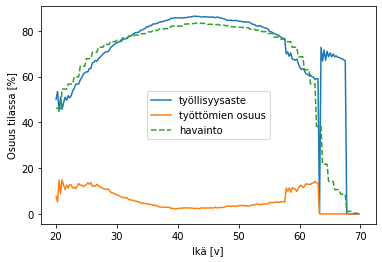

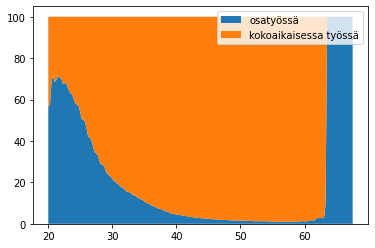

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


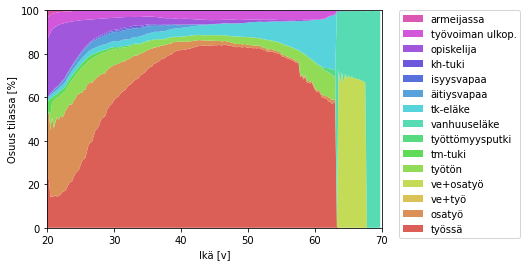

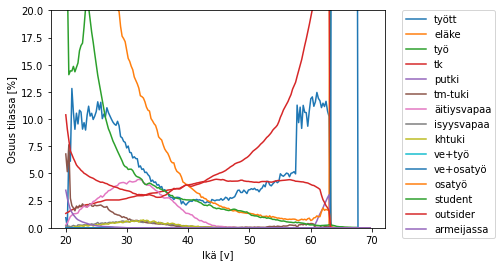

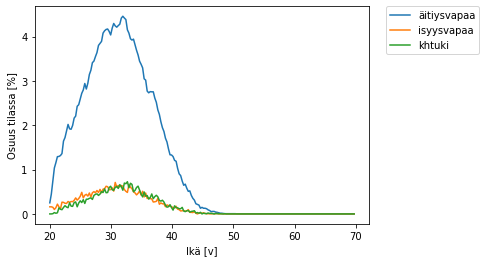

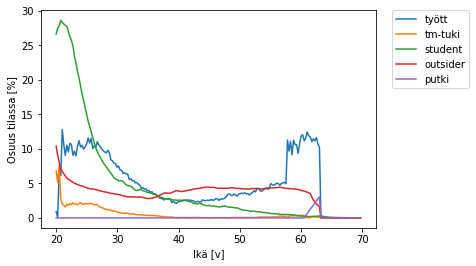

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


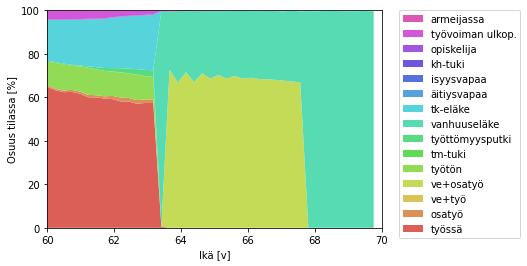

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+----------------------+
|                  |                  e/v |              toteuma |                  ero |
|------------------+----------------------+----------------------+----------------------|
| palkkatulo       | 90,726,662,873.03    | 89,134,200,000.00    |  1,592,462,873.03    |
| etuusmeno        | 38,359,243,610.17    | 36,945,147,749.00    |  1,414,095,861.17    |
| verot+maksut     | 32,151,479,129.11    | 30,763,000,000.00    |  1,388,479,129.11    |
| muut tulot       |  6,207,764,481.06    |  6,182,147,749.00    |     25,616,732.06    |
| valtionvero      |  3,409,225,654.65    |  5,542,000,000.00    | -2,132,774,345.35    |
| kunnallisvero    | 19,440,077,437.83    | 18,991,000,000.00    |    449,077,437.83    |
| ptel             |  5,761,143,065.40    |  5,560,000,000.00    |    201,143,065.40    |
| tyotvakmaksu     |  1,723,806,594.59    |  1,693,549,800.00  

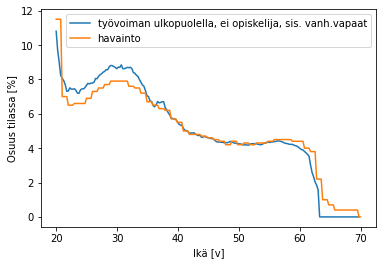

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.75 |      0.20 |       0.04 |      0.01 |        0.00 |
| 30-39 |     0.80 |      0.13 |       0.05 |      0.01 |        0.00 |
| 40-49 |     0.88 |      0.08 |       0.04 |      0.01 |        0.00 |
| 50-59 |     0.84 |      0.09 |       0.04 |      0.02 |        0.00 |
| 60-65 |     0.86 |      0.06 |       0.04 |      0.02 |        0.02 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.73 |      0.21 |       0.05 |      0.01 |        0.00 |
| 30-39 |     0.84 |      0.11 |       0.03 |      0.02 |        0.00 |
| 40-49 |     0.88 |      0.06 |       0.03 |      0.02 |        0.00 |
| 50-59 |     0.83 |      0.10 |       0.03 |      0.05 |        0.00 |
| 60-65 |     0.56 |      0.12 |       0.15 |      0.17 |        0.01 |
+-------+----------+-----------+------------+-----------+-------------+


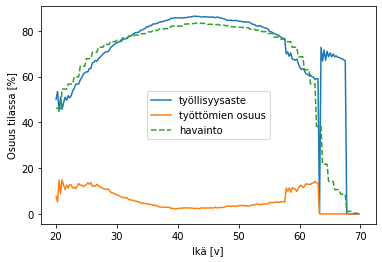

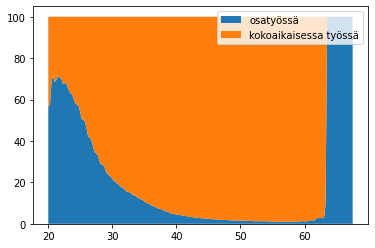

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


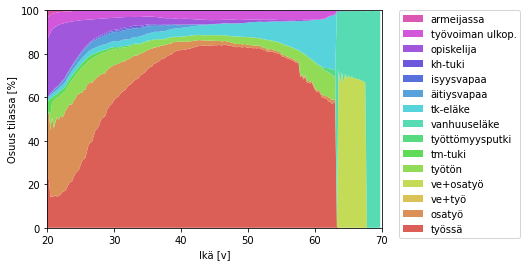

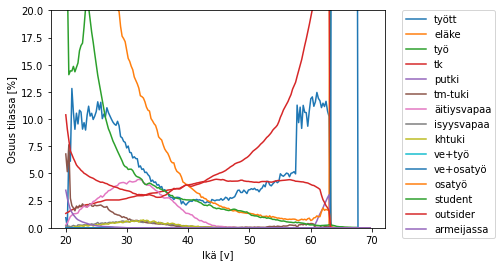

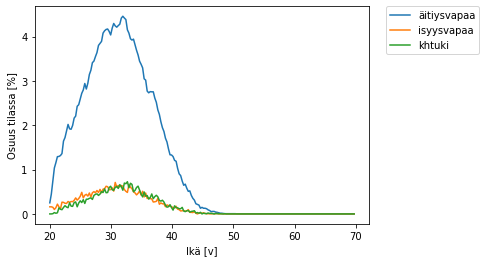

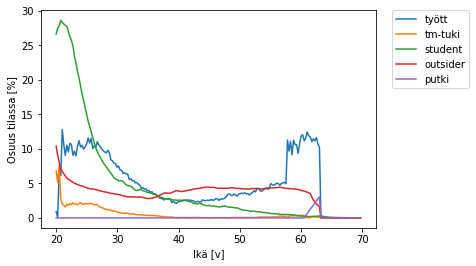

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


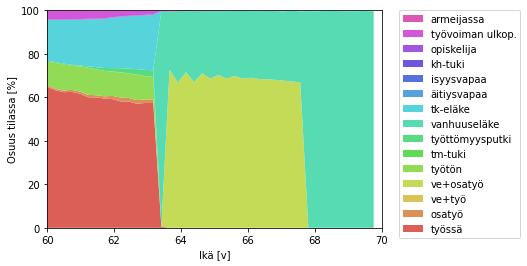

Lisäpäivillä on 3147 henkilöä


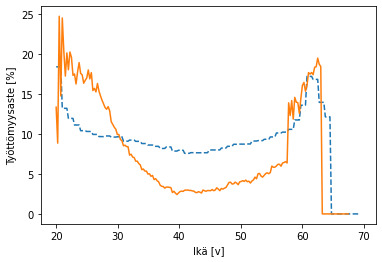

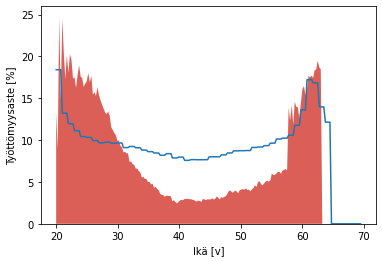

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


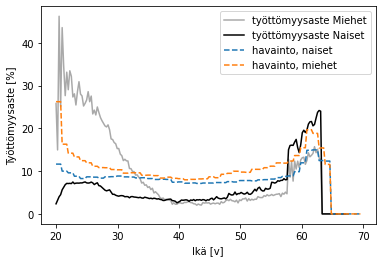

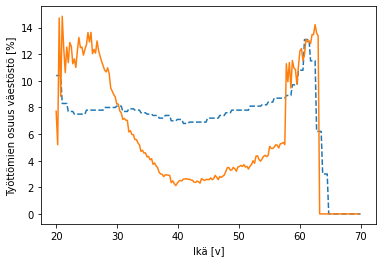

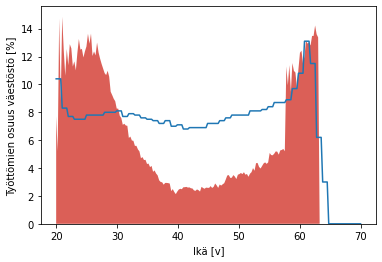

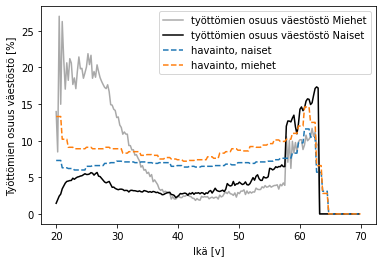

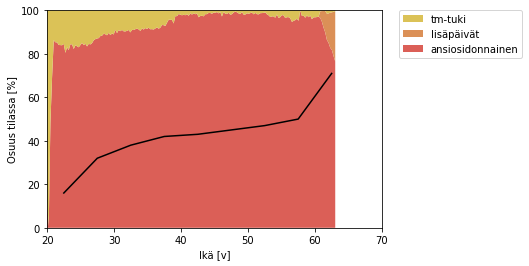

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


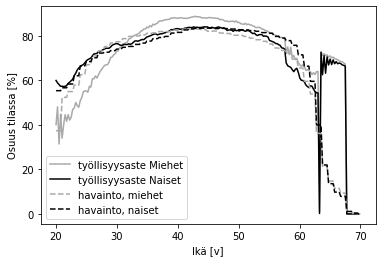

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


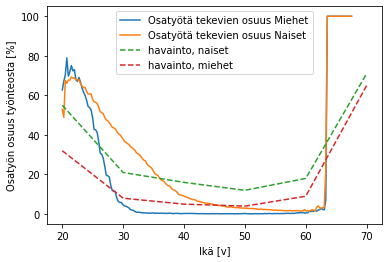

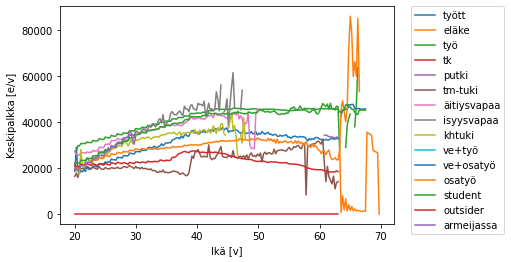

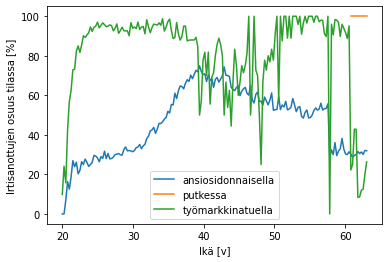

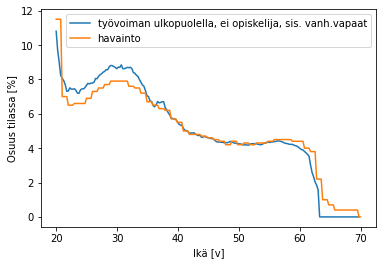

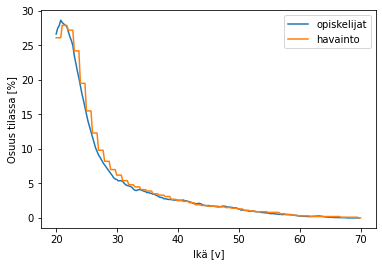

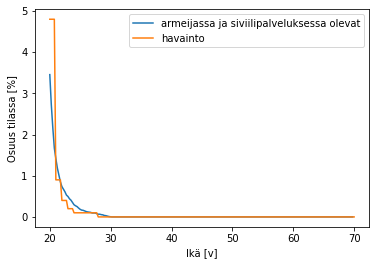

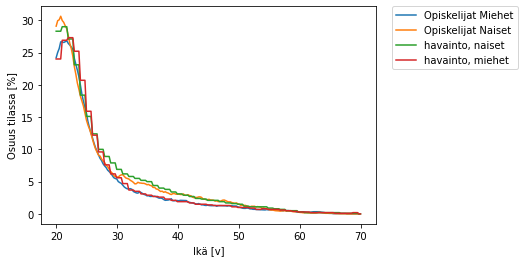

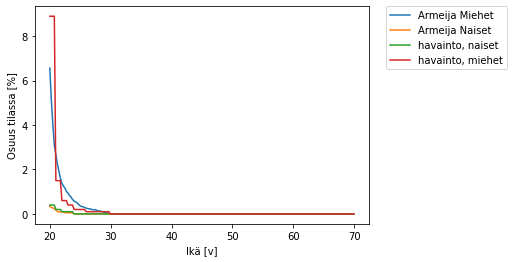

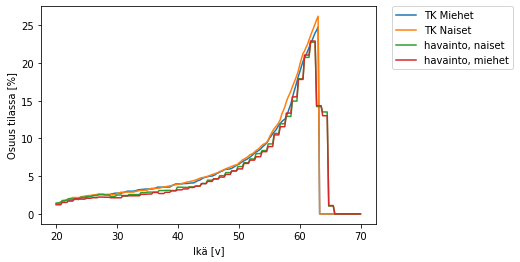

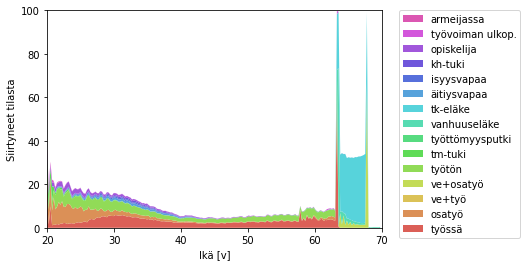

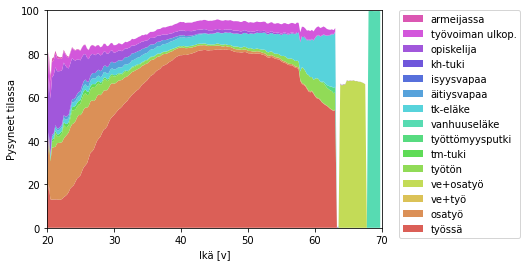

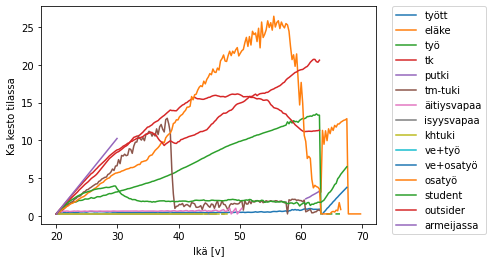

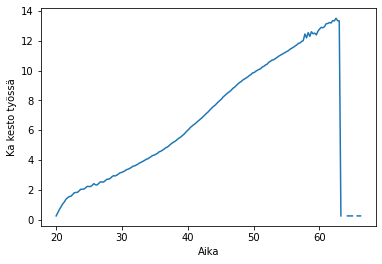

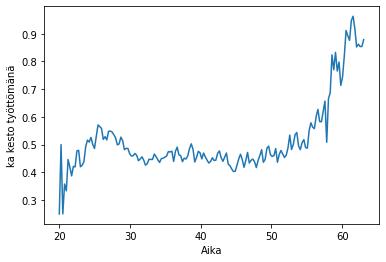

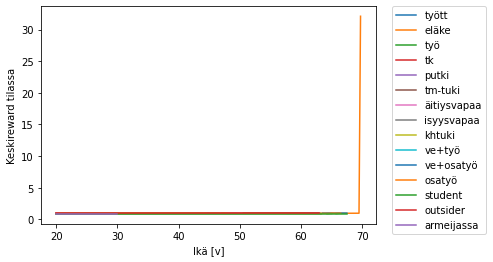

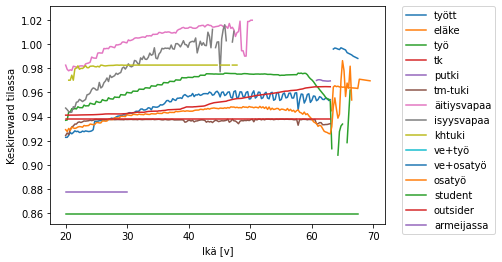

No handles with labels found to put in legend.


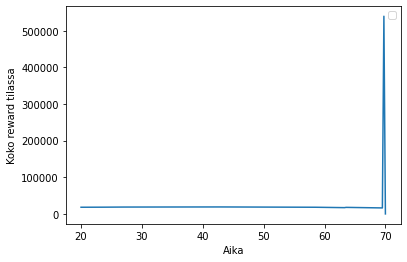

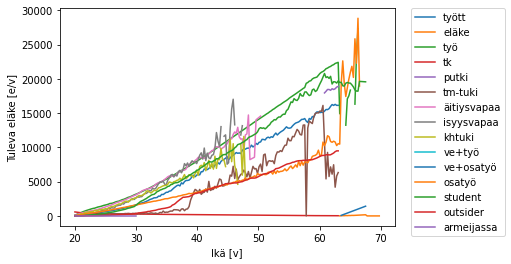

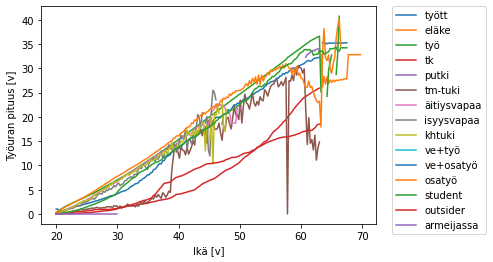

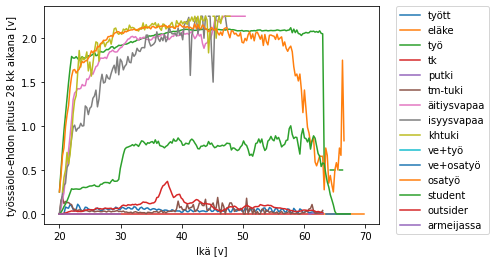

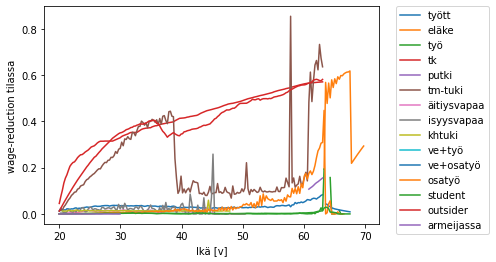

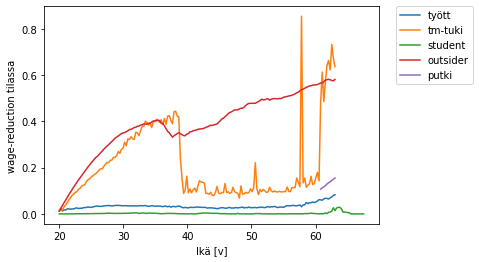

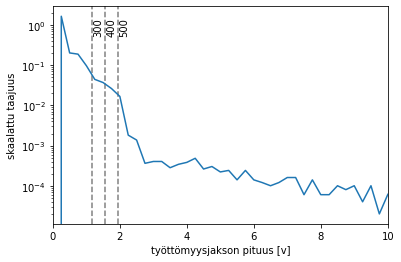

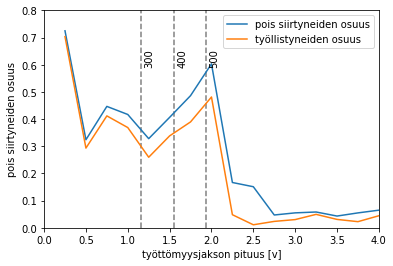

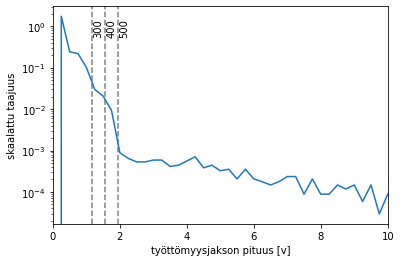

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


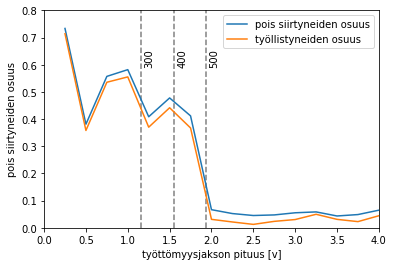

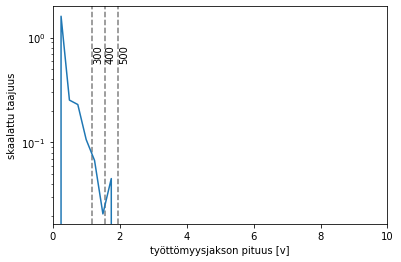

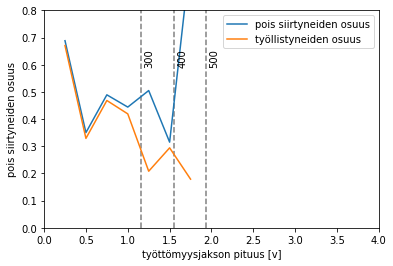

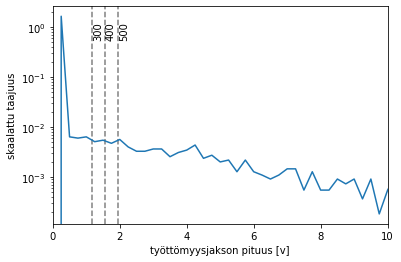

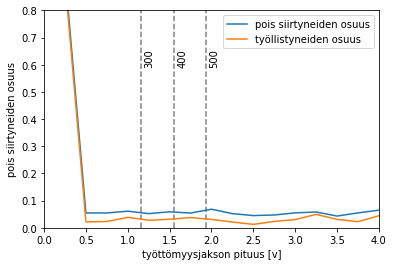

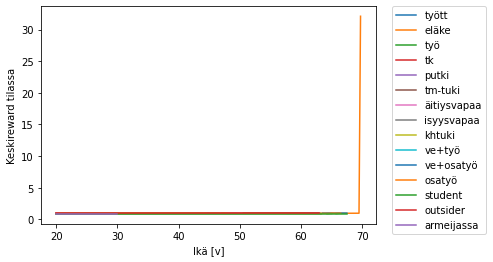

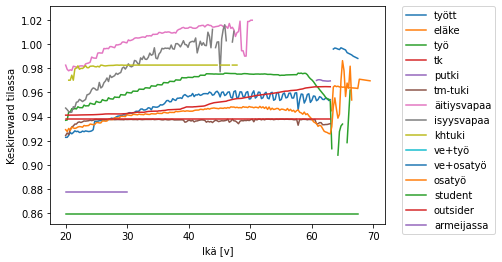

No handles with labels found to put in legend.


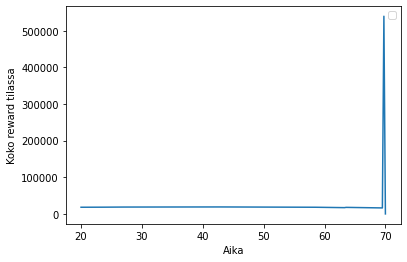

In [6]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.render(load=perusresults,figname='v2_')

In [7]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.env.unit_test_code_decode()

Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
unempwage: 2553.2341662617155 vs 2553.234166261718
children_under3: 5 vs 0
children_under7: 3 vs 0
children_under18: 7 vs 0
children_under7: 4 vs 0
children_under18: 5 vs 0
time_in_state: 0.30359174468081895 vs 0.3035917446808192
paid_pension: 2097.6621362390447 vs 2097.6621362390433
unempwage: 12907.317336373473 vs 12907.317336373475
unempwage_basis: 12300.54759266288 vs 12300.547592662879
children_under3: 8 vs 0
next_wage: 3406.4883759505183 vs 3406.4883759505174
children_under3: 8 vs 0
children_under7: 7 vs 0
children_under18: 8 vs 0
children_under3: 7 vs 0
children_under7: 8 

# IRR

Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 20000
aggregate irr 2.2600520538864175
Nans 2045 out of 20000


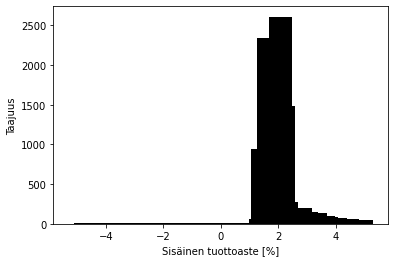

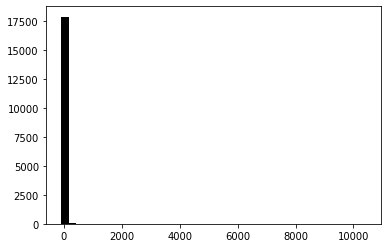

Keskimääräinen irr 4.376 %
Mediaani irr 2.032 %
Osuus irr<0 [6.185] %:lla
Osuus irr<-50 [0.18] %:lla
Osuus eläke ei maksussa 8.575000000000001 %:lla
Osuus eläke ei maksussa, ei kuollut -0.16999999999999998 %:lla
Osuus kuolleet 15.909999999999998 %:lla


In [8]:
if True:
    cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
    cc1.load_sim(perusresults)
    cc1.episodestats.plot_irr(figname='kela')

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.env.test_comp_npv()

Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
